In [1]:
#Importing packages
import numpy as np
import pandas as pd
import seaborn as sb
#import category_encoders as ce
import matplotlib.pyplot as plt
import pylab as pl
from pandas import ExcelFile
import xlrd
from sklearn import preprocessing

%matplotlib inline

In [56]:
#Openning Excel sheet and importing the data
"""
Open files and create the data frame from the excel sheet.
there are 24 columns and 142193 observations.
"""
#Assign spreadsheet file name to 'file'.
file = 'WeatherAUS-Draft.xlsx'

#Load spreadsheet.
Excel_File = pd.ExcelFile (file)
print "The file name is :", file
print "The sheet's name is:", "Data"

#Load a sheet into a dataframe by name Data:
Data = Excel_File.parse('Data')
print "The matrix size is:", np.shape (Data)
print "The file has:", np.size (Data), "data points."
print "*******************************************"
#Exploratory data analysis
print Data.shape
Data.head()
print Data.info()
print "*******************************************"
Data.head()

The file name is : WeatherAUS-Draft.xlsx
The sheet's name is: Data
The matrix size is: (142193, 14)
The file has: 1990702 data points.
*******************************************
(142193, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 14 columns):
label    142193 non-null int64
P1       142193 non-null float64
P2       142193 non-null float64
P3       142193 non-null float64
P4       142193 non-null float64
P5       142193 non-null float64
P6       142193 non-null float64
P7       142193 non-null float64
P8       142193 non-null float64
P9       142193 non-null float64
P10      142193 non-null float64
P11      142193 non-null float64
P12      142193 non-null float64
P13      142193 non-null int64
dtypes: float64(12), int64(2)
memory usage: 15.2 MB
None
*******************************************


,label,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13
0,-1,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,-1
1,-1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,-1
2,-1,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,-1
3,-1,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,-1
4,-1,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,-1


     P1    P2   P3    P4    P5    P6    P7    P8      P9     P10   P11   P12  \
0  13.4  22.9  0.6  44.0  20.0  24.0  71.0  22.0  1007.7  1007.1  16.9  21.8   
1   7.4  25.1  0.0  44.0   4.0  22.0  44.0  25.0  1010.6  1007.8  17.2  24.3   
2  12.9  25.7  0.0  46.0  19.0  26.0  38.0  30.0  1007.6  1008.7  21.0  23.2   
3   9.2  28.0  0.0  24.0  11.0   9.0  45.0  16.0  1017.6  1012.8  18.1  26.5   
4  17.5  32.3  1.0  41.0   7.0  20.0  82.0  33.0  1010.8  1006.0  17.8  29.7   

   P13  
0   -1  
1   -1  
2   -1  
3   -1  
4   -1  
0   -1
1   -1
2   -1
3   -1
4   -1
Name: label, dtype: int64


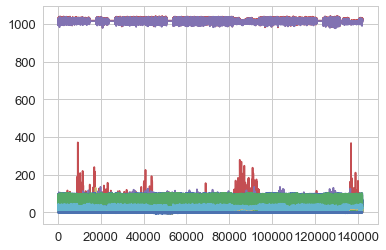

In [57]:
#Data
X = Data.drop('label', axis=1)  
y = Data['label']
print X.head()
print y.head()
#PLots
plt.plot(X) 
plt.show()

In [58]:
#Preprocessing: Scale
"""Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; 
they might behave badly if the individual features do not more or less look like standard normally distributed data:
Gaussian with zero mean and unit variance.
In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean
value of each feature, then scale it by dividing non-constant features by their standard deviation.
For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector
Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance 
in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective
function and make the estimator unable to learn from other features correctly as expected.
The function scale provides a quick and easy way to perform this operation on a single array-like dataset:"""

from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler()
print scaler  
X_scaled = scaler.fit_transform(X)
#X_new_scaled= scaler.transform(X_new)

X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = ['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
                            'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainToday']
X_scaled.head()

StandardScaler(copy=True, with_mean=True, with_std=True)


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,0.189954,-0.045964,-0.207757,0.305648,0.677661,0.614850,0.113891,-1.435935,-1.475456,-1.220966,-0.013521,0.016412,-0.532962
1,-0.749174,0.263480,-0.278989,0.305648,-1.130034,0.385532,-1.312265,-1.289821,-1.045586,-1.116203,0.032832,0.380274,-0.532962
2,0.111694,0.347873,-0.278989,0.457874,0.564680,0.844167,-1.629188,-1.046299,-1.490279,-0.981508,0.619963,0.220175,-0.532962
3,-0.467436,0.671383,-0.278989,-1.216614,-0.339167,-1.105034,-1.259444,-1.728162,-0.007969,-0.367897,0.171889,0.700472,-0.532962
4,0.831692,1.276205,-0.160269,0.077309,-0.791091,0.156214,0.694918,-0.900186,-1.015940,-1.385593,0.125537,1.166215,-0.532962


In [59]:
#Divide data into training and test sets
from sklearn.model_selection import train_test_split

#P stands for Primary sets 
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_scaled, y, test_size = 0.20) 

# Plot traning and test data
#plt.plot(X_train_p)
#plt.title('Australia Rain Data: training data')
#plt.savefig('Iris-Training data.png')
#plt.show()

#plt.plot(X_train, y_train, X_test, y_test) 
#plt.plot(X_test_p)
#plt.title('Australia Rain Data: test data')
#plt.savefig('Iris-Test data.png')
#plt.show()

In [6]:
X_train = X_train_p
X_test = X_test_p
y_train = y_train_p
y_test = y_test_p 

X_train = pd.DataFrame(X_train)
#Adding name for the columns
X_train.columns = ['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
                   'Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainToday']
X_train = X_train.reset_index()
X_train = X_train.drop('index', axis=1)                            
print X_train.shape
#print "Training data"
#print X_train.head()

X_test = pd.DataFrame(X_test)
X_test.columns = ['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
                            'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainToday']
X_test = X_test.reset_index()
X_test = X_test.drop('index', axis=1)                             
print X_test.shape
#print "Test data"
#print X_test.head()

(113754, 13)
(28439, 13)


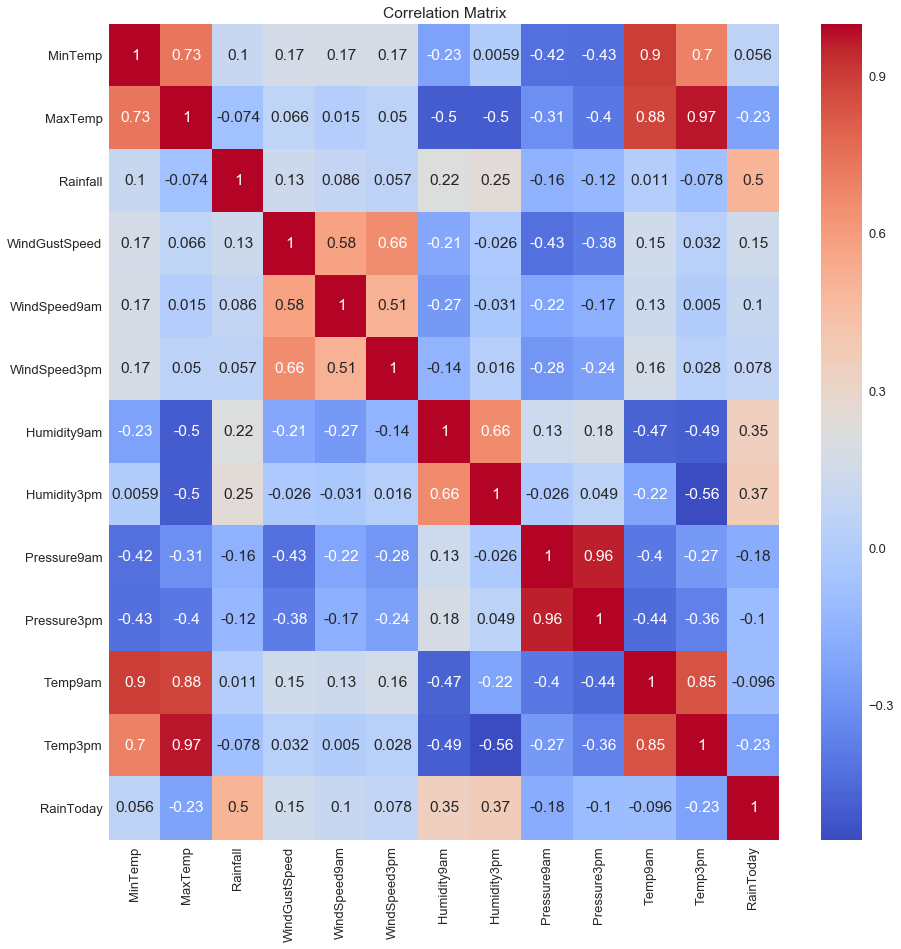

In [7]:
#Correlation map of the original data scaled
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix')
plot = sb.heatmap(X_scaled.corr(), annot=True,cmap= 'coolwarm')

# Feature Selection

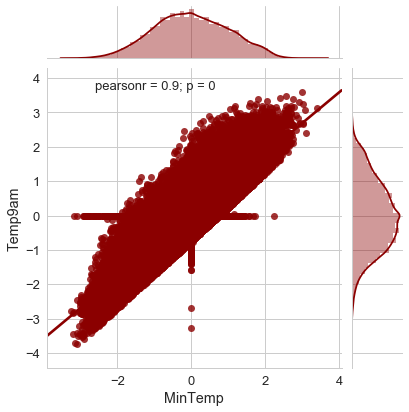

In [8]:
#Joint plot to study the correlation between two attributes

sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
#sb.jointplot(X_scaled.loc[:,'MinTemp'], X_scaled.loc[:,'Temp9am'], kind="regg", color="salmon")
sb.jointplot(X_scaled.loc[:,'MinTemp'], X_scaled.loc[:,'Temp9am'], kind="regg", color="darkred")

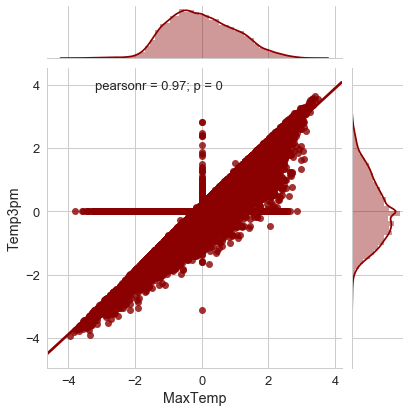

In [9]:
#Joint plot to study the correlation between two attributes

sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
#sb.jointplot(X_scaled.loc[:,'MaxTemp'], X_scaled.loc[:,'Temp3pm'], kind="regg", color="maroon")
sb.jointplot(X_scaled.loc[:,'MaxTemp'], X_scaled.loc[:,'Temp3pm'], kind="regg", color="darkred")

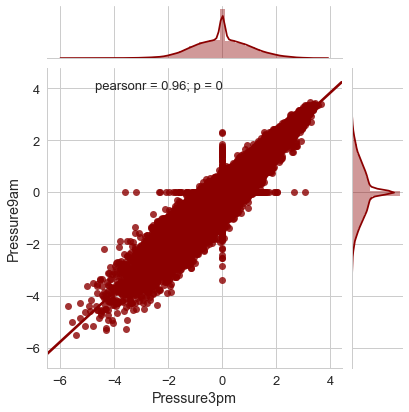

In [10]:
#Joint plot to study the correlation between two attributes

sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
sb.jointplot(X_scaled.loc[:,'Pressure3pm'], X_scaled.loc[:,'Pressure9am'], kind="regg", color="darkred")

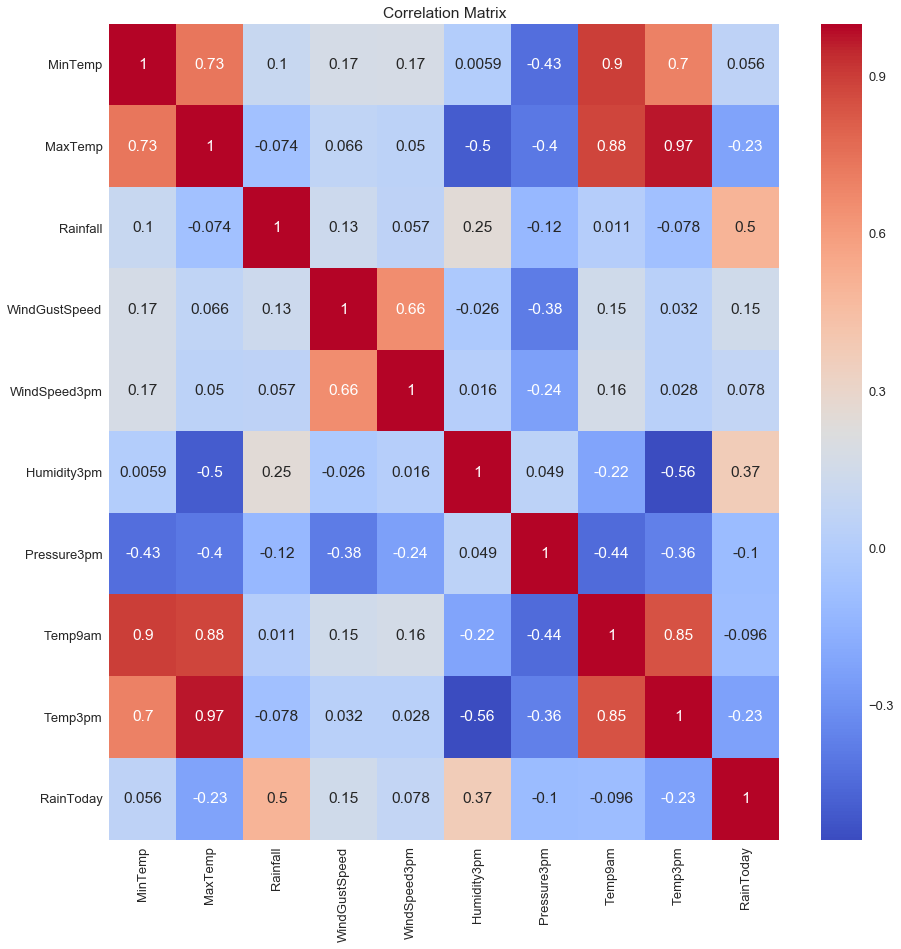

In [11]:
#1) Feature selection with correlation
drop_list1 = ['Humidity9am', 'Pressure9am', 'WindSpeed9am' ]
X_scaled_1 = X_scaled.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
X_scaled_1.head()

sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix')
plot = sb.heatmap(X_scaled_1.corr(), annot=True,cmap= 'coolwarm')

In [12]:
#Feature selection with correlation and RF classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

drop_list1 = ['Humidity9am', 'Pressure9am', 'WindSpeed9am' ]
X_train_1 = X_train.drop(drop_list1,axis = 1 )
X_test_1 = X_test.drop(drop_list1,axis = 1 )

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train_1,y_train)

y_pred = clf_rf.predict(X_test_1)

('Accuracy:', 0.83856675691831639)
('Precision:', 0.71106150793650791)
('Recall:', 0.4555855712696647)
('F-Measure:', 0.55535108958837776)
('Geometric mean:', 0.65697739182001647)
*******************************************
                   pre       rec       spe        f1       geo       iba       sup

    class 0       0.86      0.95      0.46      0.90      0.78      0.62     22146
    class 1       0.71      0.46      0.95      0.56      0.78      0.60      6293

avg / total       0.83      0.84      0.56      0.82      0.78      0.62     28439

*******************************************


Text(31,0.5,u'True labels')

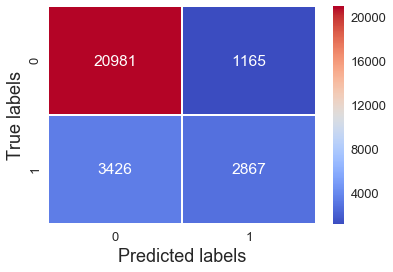

In [13]:
#Evaluation

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
print ('F-Measure:', F1)

#Model G-mean
from imblearn.metrics import geometric_mean_score
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"

#Evaluating the results
"""Confusion matrix, precision, recall, and F1 measures 
are the most commonly used metrics for classification tasks"""
from imblearn.metrics import classification_report_imbalanced
target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))
print "*******************************************"

#Confusion matrix using pyplot 
cm = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=18);ax.set_ylabel('True labels', fontsize=18)
#ax.set_title('Classifier with Linear kernel', fontsize=20)
#ax.xaxis.set_ticklabels(['Versicolor', 'Setosa']); ax.yaxis.set_ticklabels(['Versicolor', 'Setosa'])
#plt.savefig('Iris-Scaled-linear.png')

In [14]:
print "*************************************************"

*************************************************


In [18]:
#2) Recursive feature elimination (RFE) with SVM classification
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

# Create the RFE object and rank each pixel
clf_2 = SVR(kernel="linear")

rfe = RFE(estimator = clf_2, n_features_to_select=10, step=1)
rfe = rfe.fit(X_scaled, y)
print('Chosen best 10 feature by rfe:',X_scaled.columns[rfe.support_])

('Chosen best 10 feature by rfe:', Index([u'MinTemp', u'MaxTemp', u'Rainfall', u'WindGustSpeed', u'WindSpeed3pm',
       u'Humidity9am', u'Humidity3pm', u'Pressure9am', u'Pressure3pm',
       u'Temp9am'],
      dtype='object'))


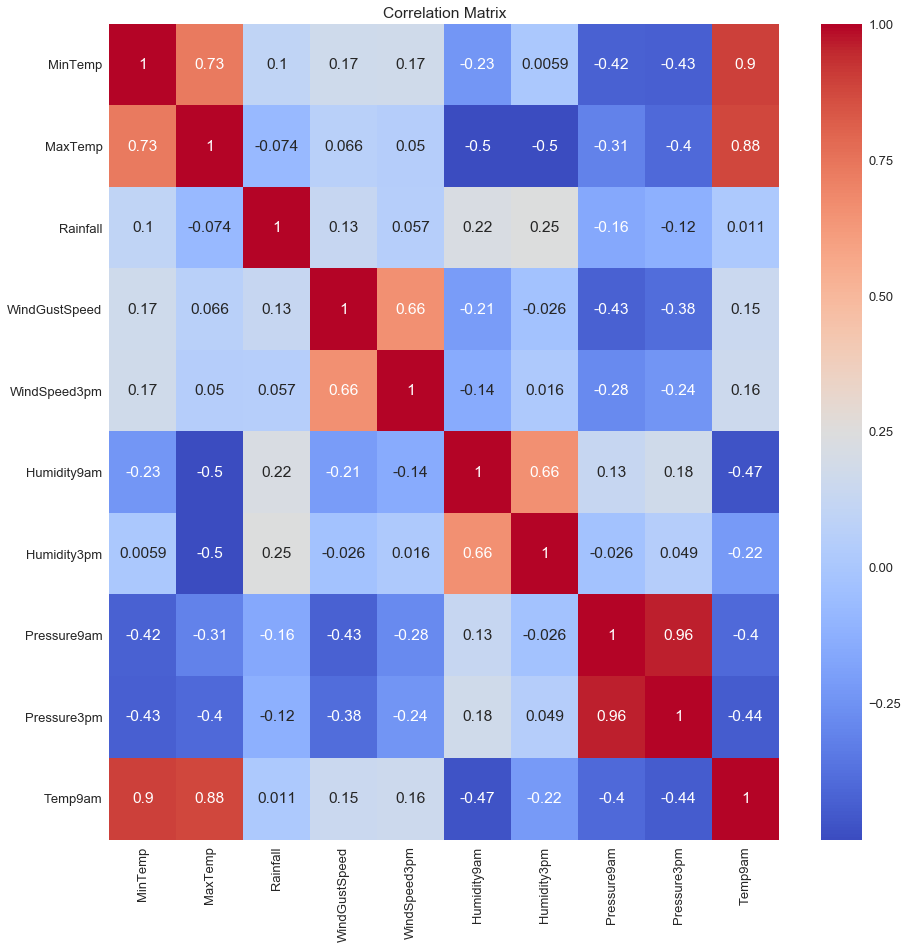

In [20]:
drop_list2 =['WindSpeed9am','Temp3pm','RainToday']
X_scaled_2 = X_scaled.drop(drop_list2, axis = 1 )        # do not modify x, we will use it later 
X_scaled_2.head()

sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix')
plot = sb.heatmap(X_scaled_2.corr(), annot=True,cmap= 'coolwarm')

In [25]:
X_train_2 = X_train.drop(drop_list2, axis = 1 )
X_test_2 = X_test.drop(drop_list2, axis = 1 )

#random forest classifier with n_estimators=10 (default)
clf_2 = SVC(kernel="linear")      
clr_2 = clf_2.fit(X_train_2, y_train)

y_pred = clf_2.predict(X_test_2)

('Accuracy:', 0.83659763001512011)
('Precision:', 0.72076180257510725)
('Recall:', 0.42698236135388529)
('F-Measure:', 0.53627382496756815)
('Geometric mean:', 0.63789617468960691)
*******************************************
                   pre       rec       spe        f1       geo       iba       sup

    class 0       0.85      0.95      0.43      0.90      0.78      0.62     22146
    class 1       0.72      0.43      0.95      0.54      0.78      0.61      6293

avg / total       0.82      0.84      0.54      0.82      0.78      0.62     28439

*******************************************


Text(31,0.5,u'True labels')

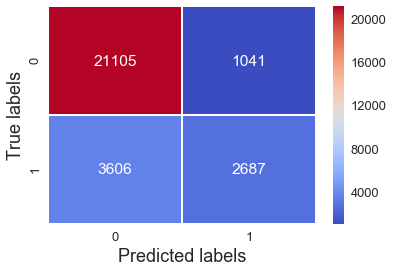

In [27]:
#Evaluation

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
print ('F-Measure:', F1)

#Model G-mean
from imblearn.metrics import geometric_mean_score
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"
#Evaluating the results
"""Confusion matrix, precision, recall, and F1 measures 
are the most commonly used metrics for classification tasks"""
from imblearn.metrics import classification_report_imbalanced
target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))
print "*******************************************"
#Confusion matrix using pyplot 
cm = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=18);ax.set_ylabel('True labels', fontsize=18)
#ax.set_title('Classifier with Linear kernel', fontsize=20)
#ax.xaxis.set_ticklabels(['Versicolor', 'Setosa']); ax.yaxis.set_ticklabels(['Versicolor', 'Setosa'])
#plt.savefig('Iris-Scaled-linear.png')

In [28]:
print "*************************************************"

*************************************************


In [29]:
#3) Recursive feature elimination (RFE) with Random forest
"""Basically, it uses one of the classification methods (random forest in our example), assign weights to each of features.
Whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively
repeated on the pruned set until the desired number of features"""

from sklearn.feature_selection import RFE

# Create the RFE object and rank each pixel
clf_3 = RandomForestClassifier(random_state=43)       
rfe = RFE(estimator = clf_3, n_features_to_select=10, step=1)
rfe = rfe.fit(X_scaled, y)
print('Chosen best 10 feature by rfe:',X_scaled.columns[rfe.support_])

('Chosen best 10 feature by rfe:', Index([u'MinTemp', u'MaxTemp', u'Rainfall', u'WindGustSpeed', u'Humidity9am',
       u'Humidity3pm', u'Pressure9am', u'Pressure3pm', u'Temp9am', u'Temp3pm'],
      dtype='object'))


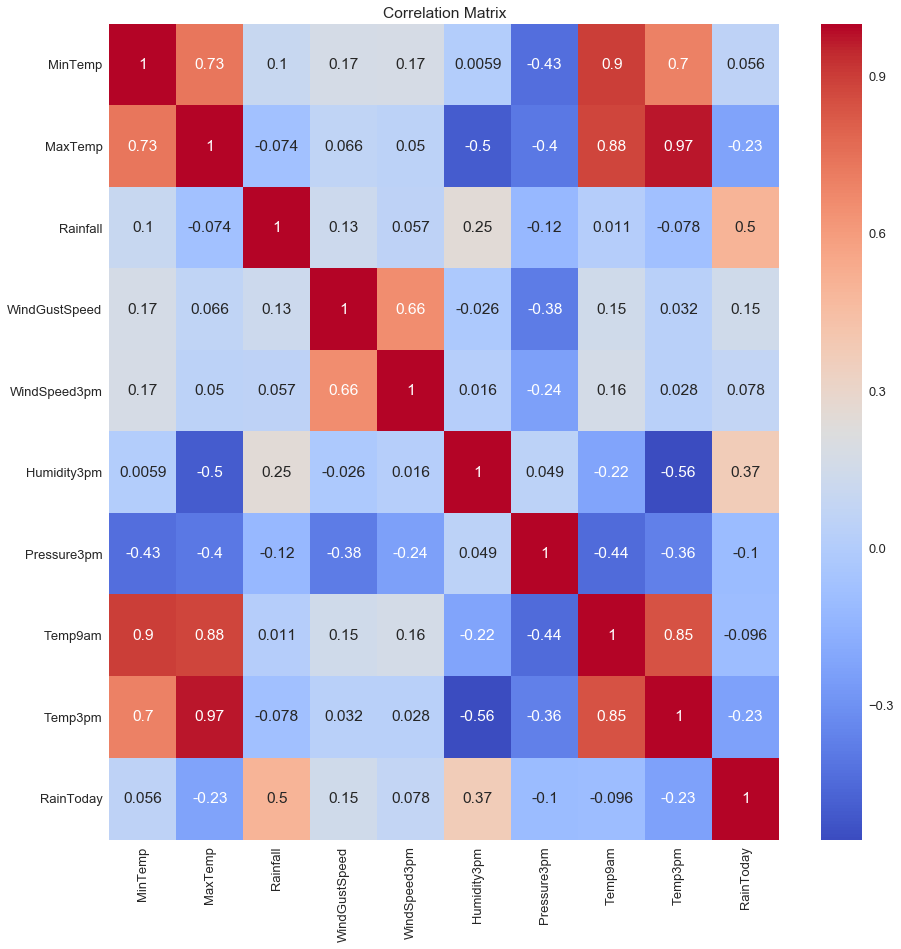

In [30]:
drop_list3 =['WindSpeed9am','WindSpeed3pm','RainToday']
X_scaled_3 = X_scaled.drop(drop_list3, axis = 1 )        
# do not modify x, we will use it later 
X_scaled_3.head()

sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix')
plot = sb.heatmap(X_scaled_1.corr(), annot=True,cmap= 'coolwarm')

In [31]:
X_train_3 = X_train.drop(drop_list3, axis = 1 )
X_test_3 = X_test.drop(drop_list3, axis = 1 )

#random forest classifier with n_estimators=10 (default)
clf_3 = RandomForestClassifier(random_state=43)      
clr_3 = clf_3.fit(X_train_3, y_train)

y_pred = clf_rf.predict(X_test_3)

('Accuracy:', 0.80101269383592955)
('Precision:', 0.56936542669584245)
('Recall:', 0.41347529000476718)
('F-Measure:', 0.47905735063978638)
('Geometric mean:', 0.6137848877698342)
*******************************************
                   pre       rec       spe        f1       geo       iba       sup

    class 0       0.85      0.91      0.41      0.88      0.69      0.49     22146
    class 1       0.57      0.41      0.91      0.48      0.69      0.47      6293

avg / total       0.78      0.80      0.52      0.79      0.69      0.49     28439

*******************************************


Text(31,0.5,u'True labels')

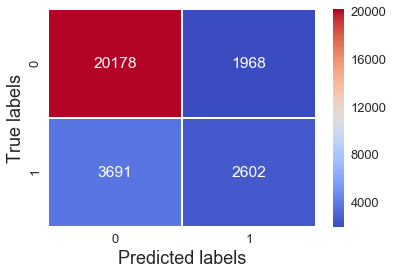

In [32]:
#Evaluation

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
print ('F-Measure:', F1)

#Model G-mean
from imblearn.metrics import geometric_mean_score
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"
#Evaluating the results
"""Confusion matrix, precision, recall, and F1 measures 
are the most commonly used metrics for classification tasks"""
from imblearn.metrics import classification_report_imbalanced
target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))
print "*******************************************"
#Confusion matrix using pyplot 
cm = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=18);ax.set_ylabel('True labels', fontsize=18)
#ax.set_title('Classifier with Linear kernel', fontsize=20)
#ax.xaxis.set_ticklabels(['Versicolor', 'Setosa']); ax.yaxis.set_ticklabels(['Versicolor', 'Setosa'])
#plt.savefig('Iris-Scaled-linear.png')

In [33]:
print "*************************************************"

*************************************************


In [34]:
#4) Recursive feature elimination with cross validation and RF classification
from sklearn.feature_selection import RFECV

clf_rf_4 = RandomForestClassifier() 

rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5, scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_scaled, y)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_scaled.columns[rfecv.support_])

('Optimal number of features :', 11)
('Best features :', Index([u'MinTemp', u'MaxTemp', u'Rainfall', u'WindGustSpeed', u'WindSpeed3pm',
       u'Humidity9am', u'Humidity3pm', u'Pressure9am', u'Pressure3pm',
       u'Temp9am', u'Temp3pm'],
      dtype='object'))


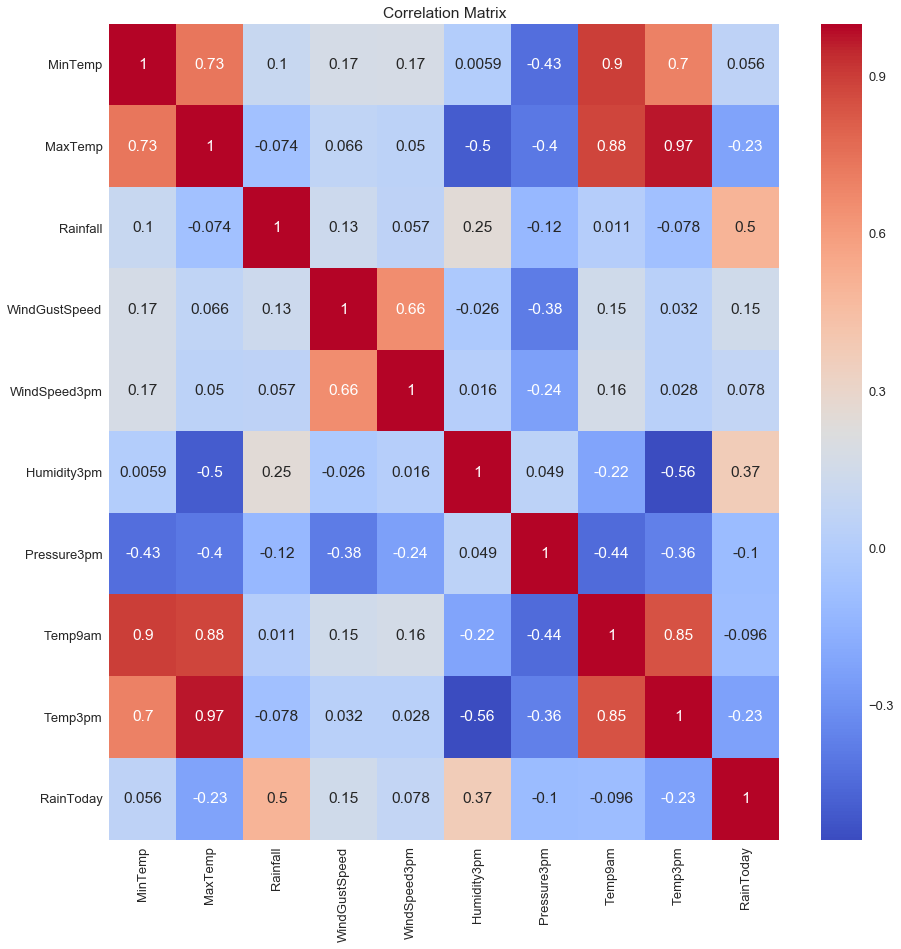

In [35]:
drop_list4 =['RainToday']
X_scaled_4 = X_scaled.drop(drop_list4, axis = 1 )        # do not modify x, we will use it later 
X_scaled_4.head()

sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix')
plot = sb.heatmap(X_scaled_1.corr(), annot=True,cmap= 'coolwarm')

('Accuracy is: ', 0.8409578395864834)


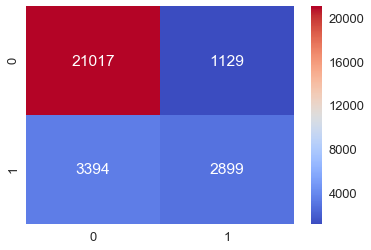

In [36]:
X_train_4 = X_train.drop(drop_list4, axis = 1 )
X_test_4 = X_test.drop(drop_list4, axis = 1 )

#random forest classifier with n_estimators=10 (default)
clf_rf_4 = RandomForestClassifier(random_state=43)      
clf_rf_4 = clf_rf_4.fit(X_train_4, y_train)

y_pred = clf_rf_4.predict(X_test_4)

ac = accuracy_score(y_test, clf_rf_4.predict(X_test_4))
print('Accuracy is: ',ac)

sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
cm = confusion_matrix(y_test,clf_rf_4.predict(X_test_4))
sb.heatmap(cm, annot=True, cmap = 'coolwarm',fmt="d")

('Accuracy:', 0.8409578395864834)
('Precision:', 0.71971201588877853)
('Recall:', 0.46067058636580327)
('F-Measure:', 0.56176727061331266)
('Geometric mean:', 0.66120016934478587)
*******************************************
                   pre       rec       spe        f1       geo       iba       sup

    class 0       0.86      0.95      0.46      0.90      0.79      0.63     22146
    class 1       0.72      0.46      0.95      0.56      0.79      0.61      6293

avg / total       0.83      0.84      0.57      0.83      0.79      0.62     28439

*******************************************


Text(31,0.5,u'True labels')

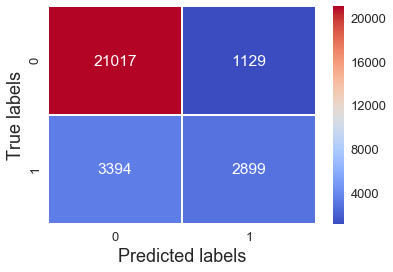

In [37]:
#Evaluation

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
print ('F-Measure:', F1)

#Model G-mean
from imblearn.metrics import geometric_mean_score
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"
#Evaluating the results
"""Confusion matrix, precision, recall, and F1 measures 
are the most commonly used metrics for classification tasks"""
from imblearn.metrics import classification_report_imbalanced
target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))
print "*******************************************"
#Confusion matrix using pyplot 
cm = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=18);ax.set_ylabel('True labels', fontsize=18)
#ax.set_title('Classifier with Linear kernel', fontsize=20)
#ax.xaxis.set_ticklabels(['Versicolor', 'Setosa']); ax.yaxis.set_ticklabels(['Versicolor', 'Setosa'])
#plt.savefig('Iris-Scaled-linear.png')

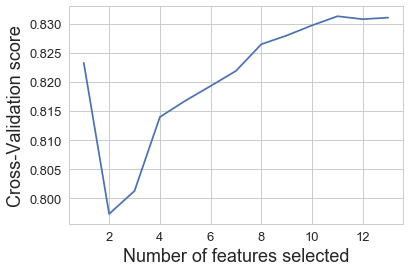

In [38]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected", fontsize = 18)
plt.ylabel("Cross-Validation score", fontsize = 18)

plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Feature ranking:
1. feature 7 (0.197316)
2. feature 9 (0.087446)
3. feature 8 (0.077432)
4. feature 6 (0.075125)
5. feature 11 (0.074769)
6. feature 0 (0.070597)
7. feature 3 (0.069709)
8. feature 10 (0.067119)
9. feature 1 (0.066886)
10. feature 2 (0.065607)
11. feature 12 (0.049683)
12. feature 4 (0.049276)
13. feature 5 (0.049035)


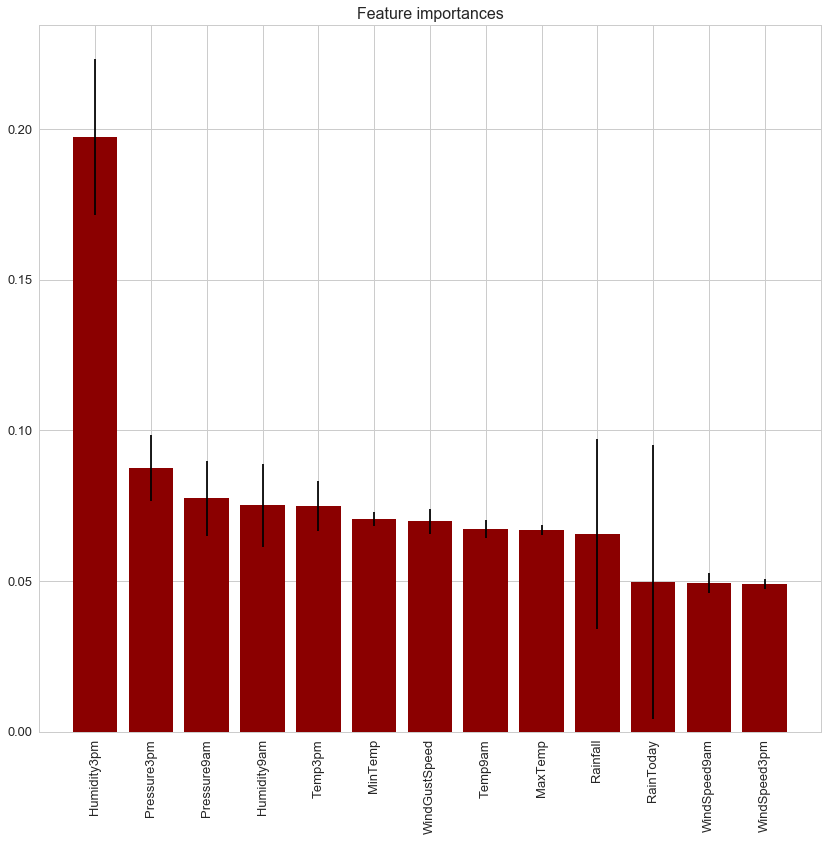

In [39]:
#5) Tree based feature selection and random forest classification
"""In random forest classification method there is a featureimportances attributes that is the feature importances 
(the higher, the more important the feature). !!! To use feature_importance method, in training data there should not 
be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list
can change."""

clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit (X_scaled, y)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_scaled.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances", fontsize = 16)
plt.bar(range(X_scaled.shape[1]), importances[indices], color="darkred", yerr=std[indices], align="center")
plt.xticks(range(X_scaled.shape[1]), X_scaled.columns[indices],rotation=90)
plt.xlim([-1, X_scaled.shape[1]])
plt.show()

In [60]:
drop_list_final =['RainToday', 'Rainfall']
X_scaled_Reduced = X_scaled.drop(drop_list_final, axis = 1 )        # do not modify x, we will use it later 
X_scaled_Reduced.head()  

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,0.189954,-0.045964,0.305648,0.677661,0.614850,0.113891,-1.435935,-1.475456,-1.220966,-0.013521,0.016412
1,-0.749174,0.263480,0.305648,-1.130034,0.385532,-1.312265,-1.289821,-1.045586,-1.116203,0.032832,0.380274
2,0.111694,0.347873,0.457874,0.564680,0.844167,-1.629188,-1.046299,-1.490279,-0.981508,0.619963,0.220175
3,-0.467436,0.671383,-1.216614,-0.339167,-1.105034,-1.259444,-1.728162,-0.007969,-0.367897,0.171889,0.700472
4,0.831692,1.276205,0.077309,-0.791091,0.156214,0.694918,-0.900186,-1.015940,-1.385593,0.125537,1.166215


('Accuracy is: ', 0.83716023770174763)


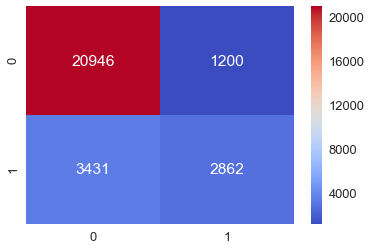

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

drop_list_final =['RainToday', 'Rainfall']
X_train_5 = X_train.drop(drop_list_final, axis = 1 )
X_test_5 = X_test.drop(drop_list_final, axis = 1 )

#random forest classifier with n_estimators=10 (default)
clf_rf_5 = RandomForestClassifier(random_state=43)      
clr_rf_5 = clf_rf_5.fit(X_train_5, y_train)

y_pred = clf_rf_5.predict(X_test_5)

ac = accuracy_score(y_test, clf_rf_5.predict(X_test_5))
print('Accuracy is: ',ac)

sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
cm = confusion_matrix(y_test,clf_rf_5.predict(X_test_5))
sb.heatmap(cm, annot=True, cmap = 'coolwarm',fmt="d")

('Accuracy:', 0.83716023770174763)
('Precision:', 0.70457902511078285)
('Recall:', 0.45479103766089307)
('F-Measure:', 0.55277643650410435)
('Geometric mean:', 0.65585653561272628)
*******************************************
                   pre       rec       spe        f1       geo       iba       sup

    class 0       0.86      0.95      0.45      0.90      0.78      0.61     22146
    class 1       0.70      0.45      0.95      0.55      0.78      0.60      6293

avg / total       0.83      0.84      0.56      0.82      0.78      0.61     28439

*******************************************


Text(31,0.5,u'True labels')

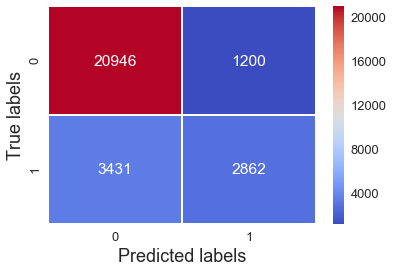

In [62]:
#Evaluation

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
print ('F-Measure:', F1)

#Model G-mean
from imblearn.metrics import geometric_mean_score
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"
#Evaluating the results
"""Confusion matrix, precision, recall, and F1 measures 
are the most commonly used metrics for classification tasks"""
from imblearn.metrics import classification_report_imbalanced
target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))
print "*******************************************"
#Confusion matrix using pyplot 
cm = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=18);ax.set_ylabel('True labels', fontsize=18)
#ax.set_title('Classifier with Linear kernel', fontsize=20)
#ax.xaxis.set_ticklabels(['Versicolor', 'Setosa']); ax.yaxis.set_ticklabels(['Versicolor', 'Setosa'])
#plt.savefig('Iris-Scaled-linear.png')

In [63]:
#Comparison
#drop_list_final_2 =['RainToday']
#X_scaled_Reduced = X_scaled.drop(drop_list_final_2, axis = 1 )        # do not modify x, we will use it later 
X_scaled_Reduced = X_scaled
X_scaled_Reduced.head()  

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,0.189954,-0.045964,-0.207757,0.305648,0.677661,0.614850,0.113891,-1.435935,-1.475456,-1.220966,-0.013521,0.016412,-0.532962
1,-0.749174,0.263480,-0.278989,0.305648,-1.130034,0.385532,-1.312265,-1.289821,-1.045586,-1.116203,0.032832,0.380274,-0.532962
2,0.111694,0.347873,-0.278989,0.457874,0.564680,0.844167,-1.629188,-1.046299,-1.490279,-0.981508,0.619963,0.220175,-0.532962
3,-0.467436,0.671383,-0.278989,-1.216614,-0.339167,-1.105034,-1.259444,-1.728162,-0.007969,-0.367897,0.171889,0.700472,-0.532962
4,0.831692,1.276205,-0.160269,0.077309,-0.791091,0.156214,0.694918,-0.900186,-1.015940,-1.385593,0.125537,1.166215,-0.532962


('Accuracy is: ', 0.83716023770174763)


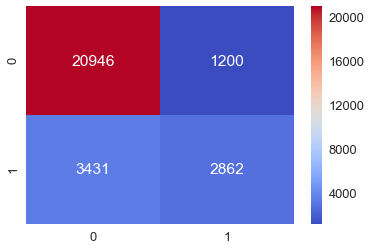

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

drop_list_final =['RainToday', 'Rainfall']
X_train_5 = X_train.drop(drop_list_final, axis = 1 )
X_test_5 = X_test.drop(drop_list_final, axis = 1 )

#random forest classifier with n_estimators=10 (default)
clf_rf_5 = RandomForestClassifier(random_state=43)      
clr_rf_5 = clf_rf_5.fit(X_train_5, y_train)

y_pred = clf_rf_5.predict(X_test_5)

ac = accuracy_score(y_test, clf_rf_5.predict(X_test_5))
print('Accuracy is: ',ac)

sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
cm = confusion_matrix(y_test,clf_rf_5.predict(X_test_5))
sb.heatmap(cm, annot=True, cmap = 'coolwarm',fmt="d")

('Accuracy:', 0.83716023770174763)
('Precision:', 0.70457902511078285)
('Recall:', 0.45479103766089307)
('F-Measure:', 0.55277643650410435)
('Geometric mean:', 0.65585653561272628)
*******************************************
                   pre       rec       spe        f1       geo       iba       sup

    class 0       0.86      0.95      0.45      0.90      0.78      0.61     22146
    class 1       0.70      0.45      0.95      0.55      0.78      0.60      6293

avg / total       0.83      0.84      0.56      0.82      0.78      0.61     28439

*******************************************


Text(31,0.5,u'True labels')

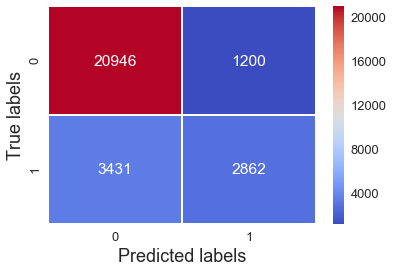

In [65]:
#Evaluation

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
print ('F-Measure:', F1)

#Model G-mean
from imblearn.metrics import geometric_mean_score
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"
#Evaluating the results
"""Confusion matrix, precision, recall, and F1 measures 
are the most commonly used metrics for classification tasks"""
from imblearn.metrics import classification_report_imbalanced
target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))
print "*******************************************"
#Confusion matrix using pyplot 
cm = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=18);ax.set_ylabel('True labels', fontsize=18)
#ax.set_title('Classifier with Linear kernel', fontsize=20)
#ax.xaxis.set_ticklabels(['Versicolor', 'Setosa']); ax.yaxis.set_ticklabels(['Versicolor', 'Setosa'])
#plt.savefig('Iris-Scaled-linear.png')